### Cleaning news dataset

In [ ]:
import pandas as pd
import re

# Read the CSV file
df = pd.read_csv('news_pakestan.csv')

# Remove whitespaces from columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Remove rows with missing values
df = df.dropna()

# Remove special characters
df['para'] = df['para'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x))
df['para'] = df['para'].apply(lambda x: re.sub('\s+', ' ', x))

# Save 
df.to_csv('cleaned_news_dataset.csv', index=False)
print(df)

In [2]:
import pandas as pd
# Read the CSV file
df = pd.read_csv('cleaned_news_dataset.csv')

# Rename the 'para' column to 'text'
df = df.rename(columns={'para': 'text'})
# Save 
df.to_csv('cleaned_news_dataset.csv', index=False)
print(df)

       Unnamed: 0                                              title  \
0           12527                     Man injured in robbery attempt   
1           12528                     Man injured in robbery attempt   
2           12529        Cop among two killed in armed attack in DHA   
3           12530    Police register FIR of robbery at Mahar’s house   
4           12531                 Woman shot dead in robbery attempt   
...           ...                                                ...   
20054       36906  Suicide attack on checkpost kills three securi...   
20055       36907               Blast in Quetta kills two injures 12   
20056       36908  Suicide attack on security post kills three in...   
20057       36909  Roadside blast kills three injures five in Der...   
20058       36910                Suicide bombing kills three in Swat   

                                                    text              date  \
0      KARACHI A man was shot and injured by robbers ... 

### Cleaning Comic dataset

In [1]:
import pandas as pd
import re

# Read the CSV file
df = pd.read_csv('thejokecafe.csv')

# Remove whitespaces from columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Remove rows with missing values
df = df.dropna()

# Remove special characters
df['Joke'] = df['Joke'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x))
df['Joke'] = df['Joke'].apply(lambda x: re.sub('\s+', ' ', x))

# Save 
df.to_csv('cleaned_comic_dataset.csv', index=False)
print(df)

        ID                                               Joke
0        1  When the cashier asks me Is that everything I ...
1        2  I rather have an enemy who admits they hate me...
2        3  I dont always think Im rightbut whenever I thi...
3        4  Im drinking coffee because people think youve ...
4        5  Everything I ever needed to know about structu...
...    ...                                                ...
7728  7729  Ive just been to a concert put on by the Bermu...
7729  7730  Ive just read a book on how dramatically footb...
7730  7731  I never thought Id buy into Feng Shui But oh h...
7731  7732  My Russian mate does not care about anyone His...
7732  7733  If you have a dog grooming business and its no...

[7733 rows x 2 columns]


In [3]:
import pandas as pd
# Read the CSV file
df = pd.read_csv('cleaned_comic_dataset.csv')

# Rename the 'Joke' column to 'content'
df = df.rename(columns={'Joke': 'content'})
# Save 
df.to_csv('cleaned_comic_dataset.csv', index=False)
print(df)

        ID                                            content
0        1  When the cashier asks me Is that everything I ...
1        2  I rather have an enemy who admits they hate me...
2        3  I dont always think Im rightbut whenever I thi...
3        4  Im drinking coffee because people think youve ...
4        5  Everything I ever needed to know about structu...
...    ...                                                ...
7728  7729  Ive just been to a concert put on by the Bermu...
7729  7730  Ive just read a book on how dramatically footb...
7730  7731  I never thought Id buy into Feng Shui But oh h...
7731  7732  My Russian mate does not care about anyone His...
7732  7733  If you have a dog grooming business and its no...

[7733 rows x 2 columns]


### Sentiment analysis of the news dataset

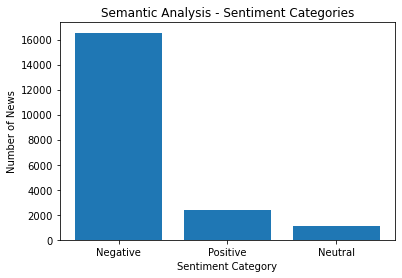

In [2]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('cleaned_news_dataset.csv')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to apply sentiment analysis 
def analyze_sentiment(text):
    if isinstance(text, str):  # Check if the text is a string
        return sia.polarity_scores(text)['compound']
    else:
        return 0  # Return 0 for NaN or non-string values

# Categorize the news into negative, positive, and neutral
df['sentiment_score'] = df['text'].apply(analyze_sentiment)
df['sentiment_category'] = df['sentiment_score'].apply(lambda score: 'Negative' if score < 0 else 'Positive' if score > 0 else 'Neutral')

# Save 
df.to_csv('categorized_news_dataset.csv', index=False)

# Count the number of news in each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Create a bar chart to visualize the sentiment analysis results
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Category')
plt.ylabel('Number of News')
plt.title('Semantic Analysis - Sentiment Categories')
plt.show()

### Selecting the news for showing in the news web app

In [15]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('categorized_news_dataset.csv')

df = df.rename(columns={'crimetype': 'keyword'})  ## renaming this column to keyword 

# Define the categories and the number of news items per category
categories = ['rape', 'raped', 'Woman', 'murder']
news_per_category = 20

# Create an empty df to store the selected news 
selected_news = pd.DataFrame()

# Iterate over each category
for category in categories:
    # Select the news items for the current category
    category_news = df[df['keyword'] == category].head(news_per_category)

    # Append the selected news items to the df
    selected_news = selected_news.append(category_news)

# Reset the index of the selected news df
selected_news.reset_index(drop=True, inplace=True)

# Save 
selected_news.to_csv('news_data1.csv', index=False)


C:\Users\Sahar\AppData\Local\Temp\ipykernel_32104\3058290620.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_news = selected_news.append(category_news)
C:\Users\Sahar\AppData\Local\Temp\ipykernel_32104\3058290620.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_news = selected_news.append(category_news)
C:\Users\Sahar\AppData\Local\Temp\ipykernel_32104\3058290620.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_news = selected_news.append(category_news)
C:\Users\Sahar\AppData\Local\Temp\ipykernel_32104\3058290620.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_news = selected_news.ap

### Selecting only negative news from sentiment

In [16]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('news_data1.csv')

# Convert the values in the "sentiment_category" column to lowercase
df['sentiment_category'] = df['sentiment_category'].str.lower()

# Filter for negative sentiment
negative_df = df[df['sentiment_category'] == 'negative']

# Save the filtered DataFrame to a new CSV file
negative_df.to_csv('news_data.csv', index=False)

### Defining a keyword column in the comic dataset

In [14]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('cleaned_comic_dataset.csv')

# Define the list of keywords to search for
keywords = ['rape', 'raped', 'Woman', 'murder']

# Create an empty list to store the extracted keywords
extracted_keywords = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    content = str(row['content'])  # Convert content to a string
    row_keywords = []

    # Check if any keyword is present in the content
    for keyword in keywords:
        if keyword in content:
            row_keywords.append(keyword)

    # Join the keywords into a string and add to the extracted_keywords list
    extracted_keywords.append(', '.join(row_keywords))

# Create a new column 'keyword' in the DataFrame and assign the extracted keywords
df['keyword'] = extracted_keywords

# Save 
df.to_csv('comic_data1.csv', index=False)


In [ ]:
# Load the CSV file
df = pd.read_csv('comic_data1.csv')

# Drop rows with blank values in the 'keyword' column
df.dropna(subset=['keyword'], inplace=True)

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)

# Save 
df.to_csv('comic_data.csv', index=False)